Probability of height between 162 cm and 190 cm: 0.893805881079399


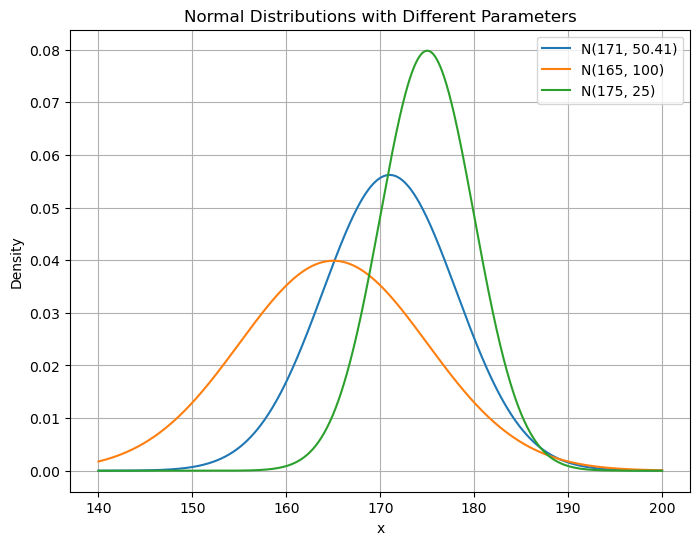

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the normal probability density function (PDF)
def normal_pdf(mean, variance, x):
    """
    Computes the probability density function (PDF) of a normal distribution.
    
    Parameters:
    mean (float): The mean (µ) of the normal distribution.
    variance (float): The variance (σ²) of the normal distribution.
    x (float or ndarray): The value(s) at which to evaluate the PDF.
    
    Returns:
    float or ndarray: The computed PDF values.
    """
    coefficient = 1 / np.sqrt(2 * np.pi * variance)  # Normalization factor
    exponent = np.exp(-((x - mean) ** 2) / (2 * variance))  # Exponential term
    return coefficient * exponent

# Function to perform numerical integration using the trapezoidal rule
def integrate_normal_pdf(mean, variance, lower_bound, upper_bound, num_steps=10000):
    """
    Numerically integrates the normal PDF over a specified range using the trapezoidal rule.
    
    Parameters:
    mean (float): The mean of the normal distribution.
    variance (float): The variance of the normal distribution.
    lower_bound (float): The lower limit of integration.
    upper_bound (float): The upper limit of integration.
    num_steps (int): The number of intervals for numerical integration (default: 10,000).
    
    Returns:
    float: The approximate probability P(a ≤ X ≤ b).
    """
    x_values = np.linspace(lower_bound, upper_bound, num_steps)  # Generate points
    area = np.trapz(normal_pdf(mean, variance, x_values), x_values)  # Trapezoidal integration
    return area

# Function to visualize multiple normal distributions
def plot_normal_distributions():
    """
    Plots three different normal distributions with varying means and variances.
    """
    x_vals = np.linspace(140, 200, 1000)  # Common x-range for all plots
    
    # Parameters for three different normal distributions
    distributions = [
        (171, 7.1 ** 2),  # Mean 171, Variance 7.1^2
        (165, 10 ** 2),   # Mean 165, Variance 10^2
        (175, 5 ** 2)     # Mean 175, Variance 5^2
    ]
    
    plt.figure(figsize=(8, 6))
    for mean, variance in distributions:
        y_vals = normal_pdf(mean, variance, x_vals)
        plt.plot(x_vals, y_vals, label=f'N({mean}, {variance})')
    
    plt.title('Normal Distributions with Different Parameters')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.grid()
    plt.show()

# Parameters for probability calculation
mean_value = 171  # Average height of males in cm
variance_value = 7.1 ** 2  # Variance (square of standard deviation)
lower_bound = 162  # Lower bound of integration
upper_bound = 190  # Upper bound of integration

# Compute the probability that a randomly chosen male has a height between 162 cm and 190 cm
probability = integrate_normal_pdf(mean_value, variance_value, lower_bound, upper_bound)
print("Probability of height between 162 cm and 190 cm:", probability)

# Plot multiple normal distributions
plot_normal_distributions()


Integrated Area: 0.8937539178438424


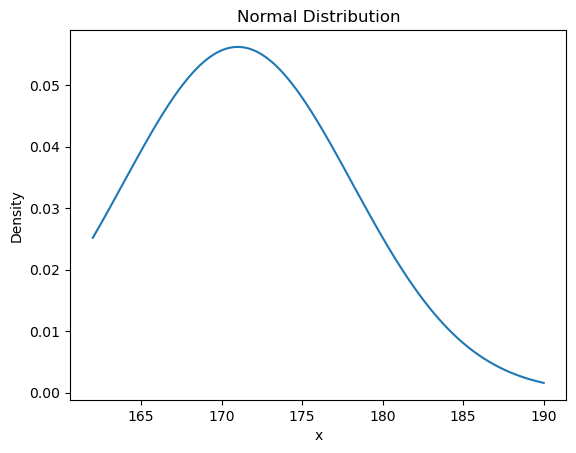

(a) E[X] for Uniform Distribution: 5.0
(b) E[X] for Exponential Distribution: 50.0
(c) Expected Drug Dosage: 2.0653403981600308e-33


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def normal_density(mean, variance, x):
    """
    Computes the probability density function (PDF) of a normal distribution.
    """
    coefficient = 1 / np.sqrt(2 * np.pi * variance)
    exponent_term = np.exp(-(x - mean)**2 / (2 * variance))
    return coefficient * exponent_term

def integration(mean, variance, a, b, num_steps=10000):
    """
    Approximates the integral of the normal distribution between limits a and b using numerical integration.
    """
    delta_x = (b - a) / num_steps
    x_values = np.linspace(a, b, num_steps)
    area = np.sum(normal_density(mean, variance, x_values) * delta_x)
    return area

def normal_distribution(mean, variance, a, b, num_points=10000):
    """
    Plots the normal distribution within the given range.
    """
    x_coords = np.linspace(a, b, num_points)
    y_coords = normal_density(mean, variance, x_coords)
    plt.plot(x_coords, y_coords)
    plt.title('Normal Distribution')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.show()

def expected_value_uniform(a, b):
    """
    Computes the expected value of a uniform distribution over [a, b].
    """
    return (a + b) / 2

def expected_value_exponential(lam):
    """
    Computes the expected value of an exponential distribution with rate lambda.
    """
    return 1 / lam

def expected_drug_dosage(mean, variance):
    """
    Estimates the expected drug dosage given the normal distribution of height.
    """
    result, _ = quad(lambda x: 2.38 * x**2 * normal_density(mean, variance, x), -np.inf, np.inf)
    return result

# Define normal distribution parameters
mean_value = 171
variance_value = 7.1**2
lower_bound = 162
upper_bound = 190

# Compute and print the probability within the given bounds
area_result = integration(mean_value, variance_value, lower_bound, upper_bound)
print("Integrated Area:", area_result)

# Plot the normal distribution
normal_distribution(mean_value, variance_value, lower_bound, upper_bound)

# Compute and print expected values for uniform and exponential distributions
a_uniform, b_uniform = 0, 10
lam_exponential = 1/50
expected_dosage = expected_drug_dosage(mean_value, variance_value)

print("(a) E[X] for Uniform Distribution:", expected_value_uniform(a_uniform, b_uniform))
print("(b) E[X] for Exponential Distribution:", expected_value_exponential(lam_exponential))
print("(c) Expected Drug Dosage:", expected_dosage)
